# Práctica 1 - Python y Librerias
## 1. Introducción
En esta práctica analizaremos el dataset **Breast Cancer Wisconsin** a partir de distintas operaciones sobre el conjunto de datos que tenemos en sklearn.

Para comenzar, importaremos el conjunto de datos y lo introduciremos en un dataframe. Luego lo separaremos en **tres dataframes distintos** ya que podemos observar tres tipos distintos de categorías en nuestro conjunto de datos y nos puede interesar para distintas estadísticas.

In [85]:
# --- Importaciones ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# --- Cargar datos (Breast Cancer) ---
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
target_names = cancer.target_names

df_means = df[[c for c in df.columns if "mean"  in c.lower()] + ['target']]
df_error = df[[c for c in df.columns if "error" in c.lower()] + ['target']]
df_worst = df[[c for c in df.columns if "worst" in c.lower()] + ['target']]

print("Matriz original:" + str(df.shape[0]) + " filas y " + str(df.shape[1]) + " columnas")
print("Matriz medias: "  + str(df_means.shape[0]) + " filas y " + str(df_means.shape[1]) + " columnas")
print("Matriz error: "   + str(df_error.shape[0]) + " filas y " + str(df_error.shape[1]) + " columnas")
print("Matriz worst: "   + str(df_worst.shape[0]) + " filas y " + str(df_worst.shape[1]) + " columnas")

print(target_names[0])


Matriz original:569 filas y 31 columnas
Matriz medias: 569 filas y 11 columnas
Matriz error: 569 filas y 11 columnas
Matriz worst: 569 filas y 11 columnas
malignant


## 2. Análisis

Una vez que tenemos los dataframes, pasamos a hacer distintas **estadísticas** sobre ellos: 

- Comenzaremos mostrando por pantalla una pequeña **muestra** de los datos (mostraremos los datos separados para mayor legibilidad):

In [86]:
df_means.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [87]:
df_error.head(5)

,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,target
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0


In [88]:
df_worst.head(5)

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


- Ahora mostraremos con un **diagrama de barras** los elementos que hay en cada clase.


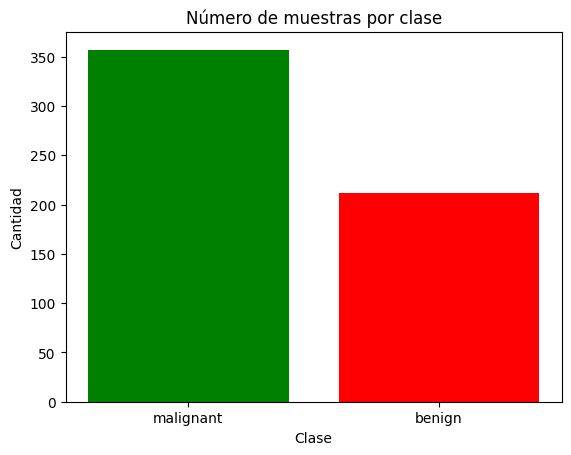

In [89]:
counts = df['target'].value_counts()

plt.bar(target_names, counts, color=['green', 'red'])
plt.title('Número de muestras por clase')
plt.ylabel('Cantidad')
plt.xlabel('Clase')
plt.show()

- Continuaremos haciendo una **media** de los datos **agrupados por clase**. Esto nos podría permitir observar más claramente si hay disparidad considerable en las medias generales de los casos positivos y negativos.


In [90]:
df_means.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
target,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867





- Ahora representaremos las **medias del radio** en dos **histogramas agrupados por clase**. Para ello crearemos unos **bins comunes** para poder ver la información representada de forma más coherente.

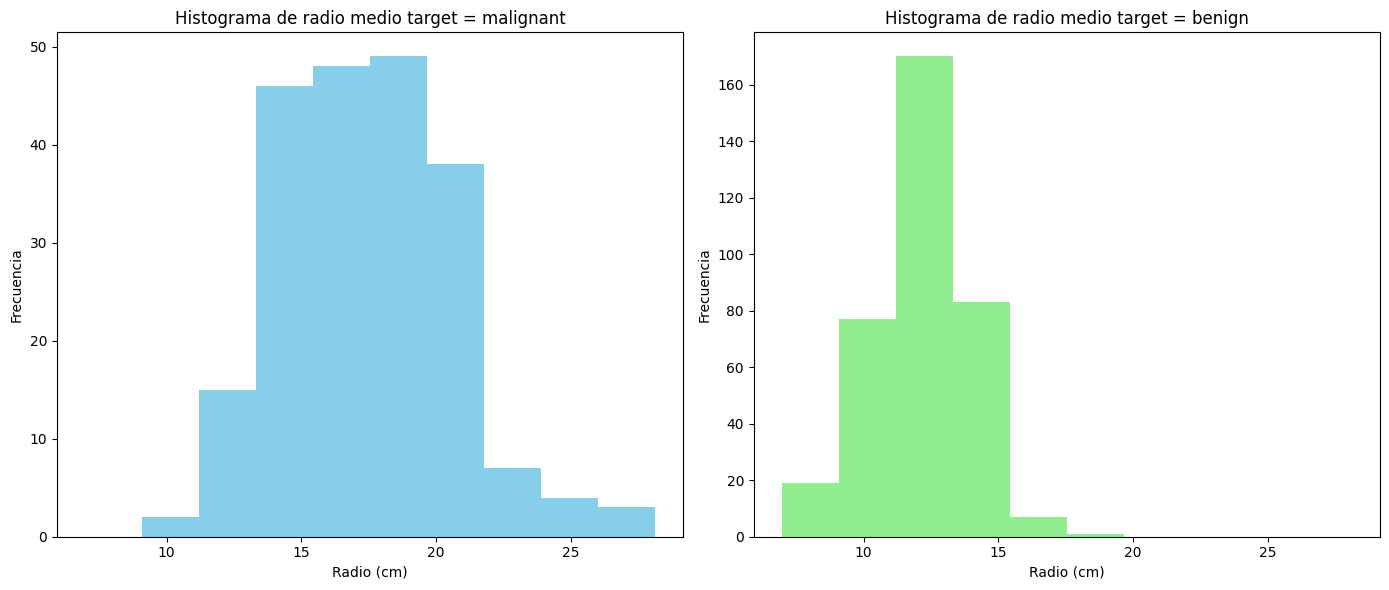

In [91]:
data_0 = df_means[df_means["target"] == 0]["mean radius"]
data_1 = df_means[df_means["target"] == 1]["mean radius"]

min_val = min(data_0.min(), data_1.min())
max_val = max(data_0.max(), data_1.max())

bins = np.linspace(min_val, max_val, 11)

plt.figure(figsize=(14,6))

plt.subplot(121)
plt.hist(data_0, bins=bins, color='skyblue')
plt.title(f'Histograma de radio medio target = {target_names[0]}')
plt.xlabel('Radio (cm)')
plt.ylabel('Frecuencia')

plt.subplot(122)
plt.hist(data_1, bins=bins, color='lightgreen')
plt.title(f'Histograma de radio medio target = {target_names[1]}')
plt.xlabel('Radio (cm)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


- Ahora realizacemos un **scatter plot** en el que compararemos la **concavidad media** y la **compacidad media** en cada una de las clases (benigno / maligno).

    Esto nos ayudará a observar si existe una separación en dos grupos debido a estas características.

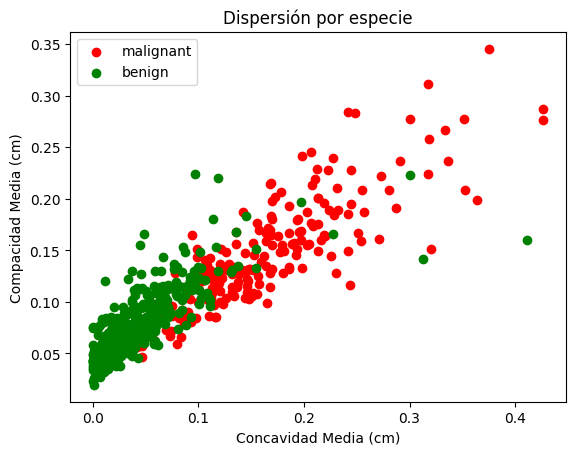

In [97]:
colors = ['red', 'green']
for i in range(2):
    plt.scatter(df_means[df_means['target'] == i]['mean concavity'],
                df_means[df_means['target'] == i]['mean compactness'],
                label=target_names[i], color=colors[i])
plt.xlabel('Concavidad Media (cm)')
plt.ylabel('Compacidad Media (cm)')
plt.title('Dispersión por especie')
plt.legend()
plt.show()

- Continuamos comparando las **textura media** y el **radio medio** por cada clase, con intención de comprobar si existe alguna relación entre estos valores y su pertenencia a la clase.


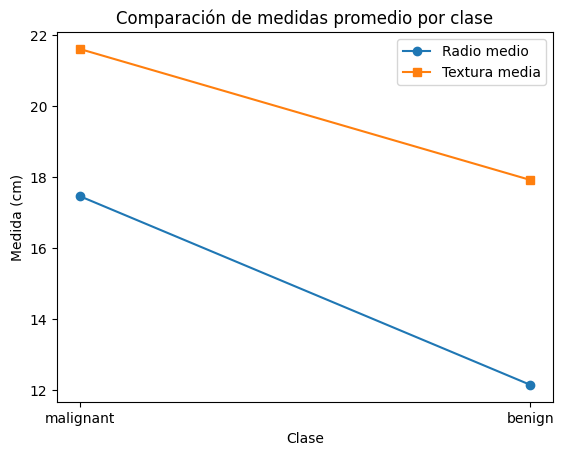

In [93]:
grouped_means = df_means.groupby('target')[['mean radius', 'mean texture']].mean()

plt.plot(target_names, grouped_means['mean radius'], label='Radio medio', marker='o')
plt.plot(target_names, grouped_means['mean texture'], label='Textura media', marker='s')
plt.title('Comparación de medidas promedio por clase')
plt.ylabel('Medida (cm)')
plt.xlabel('Clase')
plt.legend()
plt.show()

- Por último, usaremos un **arbol de decisión** con nuestro dataset para entrenar un modelo que pueda predecir la pertenencia a una u otra clase.

In [94]:

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión del modelo: 0.9473684210526315

Matriz de confusión:
[[40  3]
 [ 3 68]]


## 3. Conclusión

Con estas gráficas podemos observar que, en la gran mayoría de casos, las características del dataset tienen valores numéricos **menores** en los tumores benignos que en los malignos (radio, textura, concavidad, ...). Esto podría ser un indicio de que los **tumores benignos son más pequeños que los malignos**.